[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/scryptan/python_hw/blob/master/First_hw_python.ipynb)

In [15]:
import grequests
import requests

from datetime import datetime
from IPython.display import clear_output

import pandas as pd
import matplotlib.pyplot as plt

import os
import os.path
import json
import warnings
warnings.simplefilter("ignore", category=UserWarning)

# Собираем список id всех объектов

In [3]:
start = datetime.now()

offset_ = 1
limit_ = 100
a_urls = []

for i in range(110): # 110 - волшебное число, да не хорошо, но если делать нормально через вычитывание всего, то очень долго проверять, а так методом тыка стало известно, что там меньше 11к записей
    a_urls.append(f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={offset_ * i * limit_}&limit={limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0')
    
async_list = []

rs = [grequests.get(u) for u in a_urls]
objids = []
for res in grequests.imap(rs, size=16):
    if not res.ok:
        continue
        
    objects_data = res.json()
    objects_list = objects_data.get('data').get('list')
    if not objects_list:
        continue
    
    clear_output()
    objids.extend(x.get('objId') for x in objects_list)
    print(len(objids))

print(len(objids))
print(datetime.now() - start)

10587
10587
0:00:11.753770


# Собираем все возможные объекты по полученным прежде id

In [ ]:
start = datetime.now()
full_objects = []


a_fullObj_urls = []
for objId in objids:
    a_fullObj_urls.append(f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/{objId}')

rs_objects = [grequests.get(u) for u in a_fullObj_urls]

for res in grequests.imap(rs_objects, size=16):
    if not res.ok:
        continue
        
    object_data = res.json()
    full_obj = object_data.get('data')

    if not full_obj:
        continue
    
    clear_output()
    full_objects.append(full_obj)
    print()
    print(f'{len(full_objects)}/{len(objids)}')

print(len(full_objects))
print(datetime.now() - start)

In [12]:
out_filename = "./output/output.csv"

if full_objects:
    df = pd.json_normalize(full_objects)
elif os.path.exists(out_filename):
    df = pd.read_csv(out_filename)
    full_objects = json.loads(df.to_json(orient="split"))
else:
    raise Exception('Empty objects')

if not os.path.exists(out_filename):
    os.makedirs(os.path.dirname(out_filename), exist_ok=True)
    df.to_csv(out_filename)  
    
df

,id,pdId,region,address,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objLkFinishTypeDesc,...,developer.orgBankruptMsgDttm,airQualityIndexValue,metro.id,metro.name,metro.line,metro.color,metro.time,metro.isWalk,metro.colors,complexShortNm
0,47495,471284,28,"г Благовещенск, литера 7",15.0,15,182,2024-03-31,Кирпич,Без отделки,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29888,120339,23,"г Анапа, ул Адмирала Пустошкина, д. 22, литера 10",17.0,17,240,2022-09-30,Другое,Под ключ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,47960,634257,1,"г Майкоп, Степная, литера Р5",1.0,1,0,2024-12-31,Другое,Под чистовую,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,47961,634178,1,"г Майкоп, Степная, литера 1",1.0,9,157,2023-12-31,Монолит-кирпич,Под чистовую,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,37016,269494,78,"г Санкт-Петербург, пр-кт Малоохтинский, д. 68",4.0,11,918,2023-12-31,Другое,Без отделки,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,42823,494660,23,"г Краснодар, ул Обрывная, д. 132/1, литера 5, ...",17.0,25,180,2024-12-31,Монолит-кирпич,Под чистовую,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3007,44809,553544,23,"г Краснодар, ул Обрывная, д. 132/1, литера 4, ...",17.0,17,154,2025-03-31,Монолит-кирпич,Без отделки,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3008,42821,494660,23,"г Краснодар, ул Обрывная, д. 132/1",2.0,2,0,2023-12-31,Монолит-кирпич,Без отделки,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3009,42825,494660,23,"г Краснодар, ул Обрывная, д. 132/1",2.0,2,0,2024-12-31,Монолит-кирпич,Без отделки,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


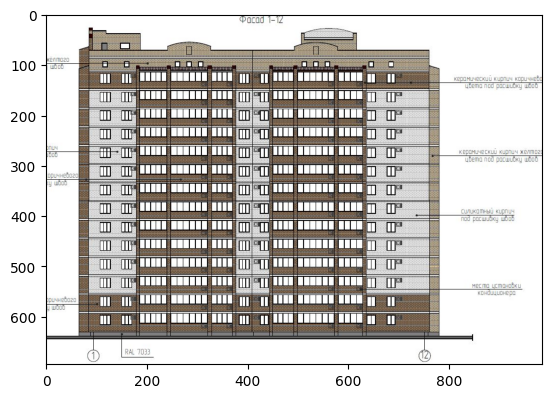

In [19]:
def download_photo(): # сделал скачивание картинки с конкретного объекта, можно заменить на цикл и всё будет работать, но с 11к объектов качать картинки такое себе
    id = full_objects[0].get('id')
    photo_obj = full_objects[0].get('photoRenderDTO')
    
    if not photo_obj: # значит картинки нет
        return
    
    link = photo_obj[0].get('objRenderPhotoUrl') # так же качаю первую картинку, тоже можно заменить на цикл, если сильно захотеть
    resp = requests.get(link).content
    filename = f'./output/images/{id}.jpg' 
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    with open(filename, 'wb') as f:
        f.write(resp)
    plt.imshow(plt.imread(filename))

download_photo()